   userId     username                  name
0       1     iris9112  Isabel Ruiz Buriticá
1       2  dianaclarke                 Diana
2       3  nateprewitt          Nate Prewitt
3       4       oldani       Ordanis Sanchez
4       5   waflessnet            waflessnet
   repoId                              title  \
0       1                airbnb / javascript   
1       2  kamranahmedse / developer-roadmap   
2       3                 microsoft / vscode   
3       4                   torvalds / linux   
4       5              ytdl-org / youtube-dl   

                                          categories    stars  
0                                          completar      NaN  
1        Roadmap to becoming a web developer in 2019  85800.0  
2                                 Visual Studio Code  80855.0  
3                           Linux kernel source tree  78761.0  
4  Command-line program to download videos from Y...  53909.0  
   userId  repoId  rating
0       1       1       2
1    

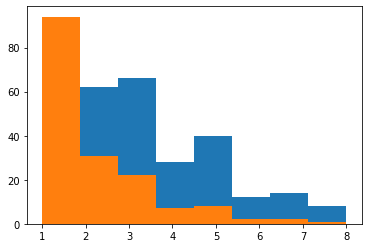

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 26 14:32:36 2020

@author: meldu
"""

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

df_users = pd.read_csv("users.csv")
df_repos = pd.read_csv("repos.csv")
df_ratings = pd.read_csv("ratings.csv")
print(df_users.head())
print(df_repos.head())
print(df_ratings.head())

n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

plt.hist(df_ratings.rating,bins=8)

df_ratings.groupby(["rating"])["userId"].count()

plt.hist(df_ratings.groupby(["repoId"])["repoId"].count(),bins=8)

df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix

ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))